# Physics 77/88 - Fall 2024 - Homework 7 
## Monte-Carlo Simulation and Numerical Integration
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Nov 10th 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Total: 25P

In the lecture, we showed how a **M**onte-**C**arlo **S**imulation (**MCS**) can be used for estimating $\pi$. A MSC can also be used for estimating an integral numerically, even if the object of which the integral has to be calculated is high dimensional.<br>
<br>
Consider the volume $V$ of a $N$ dimensional *hypersphere* or *N-ball* of radius $R$:<br>
<br>
$V_N(R) = \frac{\pi^{N/2}}{\Gamma(\frac{N}{2}+1)}\,R^N$  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
<br>


Here, $\Gamma(x)$ is Euler's gamma function. Note, that for solving the problem, **no knowledge about the gamma function is needed**. In Python, we can import the gamma function via:

In [1]:
import math
N = 3
Result = math.gamma(N/2 + 1)

As an estimate, the values for the volumes of the following $N$ are:<br>
<br>
$N = 2$: $V =\pi\,R^2 \approx 3.142\,R^2$<br>
$N = 3$: $V = \frac{4}{3}\pi\,R^3 \approx 4.189\,R^3$<br>
$N = 4$: $V \approx 4.935\,R^4$<br>
$N = 5$: $V \approx 5.264\,R^5$<br>
<br>
and so on.<br>
<br>
See also https://en.wikipedia.org/wiki/Volume_of_an_n-ball

The goal of the homework assignment is to learn how to apply a concept that has been introduced during the lecture for a more general case. Also, hyperspheres play an important role in Statistical Physics.  

## Problem 1 (20P)

Write the function **MC_ND_Sphere** using *def* that takes the number $M$ of sampling points, the number of dimensions $N$ and $R$, the radius as input arguments and approximates the volume of a $N$-dimensional hypersphere via a MCS.<br> 
The function should return the approximated **mean value** after 100 runs and the **standard deviation** as well as the **exact value from equation 1)**. You can use the MCS code from the lecture as backbone for your code.<br> 

In [4]:
import numpy as np
import math

def MC_ND_Sphere(M, N, R):
    mreps = 100
    volumes = np.empty((mreps))
    exact_volume = (np.pi**(N/2) * R**N) / math.gamma(N/2 + 1)
    
    for i in range(mreps):
        points = np.random.uniform(-R, R, (M, N))
        distances = np.linalg.norm(points, axis = 1)
        inside_sphere = np.sum(distances < R)
        volumes[i] = (2 * R)**N * (inside_sphere / M)

    mean = np.mean(volumes)
    std = np.std(volumes)

    return mean, std, exact_volume

<br>

## Problem 2 (5P)

Call the function for five or six different values of $N$ using *map*. How do you need to change the number of sampling points in order to maintain **roughly** the same accuracy for the different $N$? Generate a plot of your result. The plot should look similar to

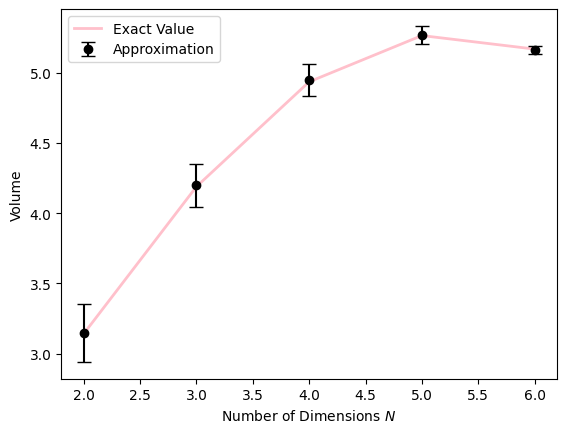

In [16]:
import matplotlib.pyplot as plt

R = 1
dimensions = [2, 3, 4, 5, 6]
M = 10000 * [8 ** d for d in dimensions]

results = list(map(lambda M, N: MC_ND_Sphere(M, N, R), M, dimensions))

mean_volumes, std_volumes, exact_volumes = zip(*results)

plt.plot(dimensions, exact_volumes, label = "Exact Value", color = "pink", linewidth = 2)
plt.errorbar(dimensions, mean_volumes, label = "Approximation", color = "black", yerr = std_volumes, fmt = 'o', ecolor = "black", capsize = 5)
plt.xlabel("Number of Dimensions $N$")
plt.ylabel("Volume")
plt.legend()
plt.show()

The number of sampling points must increase exponentially with the number of dimensions as $M=8^N$ in order to maintain roughly the same accuracy

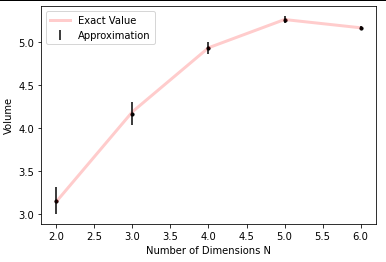

for $R = 1$ and similar to

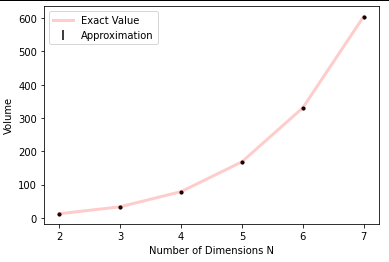

for $R = 2$.